In [12]:
import numpy as np
from scipy.linalg import lstsq, norm
from scipy.optimize import nnls as lstsqNonNeg
from numpy.random import rand, randn
import matplotlib.pyplot as plt

from GDmethods import lsgd, lsgdNesterov, lsgdNonNeg

## Standard gradient descent
### Fitting a system of equations with a least-squares solution

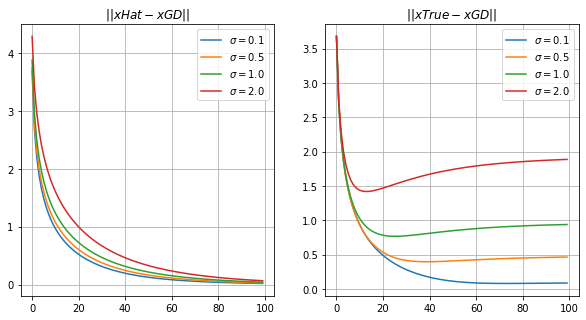

In [34]:
# problem parameters
m = 100
n = 50
sigmas  = [0.1, 0.5, 1, 2]
numIter = 100

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
for sigma in sigmas:
    np.random.seed(0)
    # set up A, x, and b
    A = randn(m,n)
    xtrue = rand(n,1)
    b = A@xtrue + sigma*randn(m,1)

    # parameters for lsgd
    mu = 1/norm(A,2)**2
    x0 = np.zeros((n,1))
    
    # lstsq solver solution
    xh = lstsq(A,b)[0]
    
    diff_xh = np.zeros(numIter)
    diff_xtrue = np.zeros(numIter)
    
    for ii in range(numIter):
        # perform lsgd for ii iterations
        xgd = lsgd(A,b,mu,x0,ii)
        
        # compare difference to lstsq solution and true value
        diff_xh[ii] = norm(xh - xgd,2)
        diff_xtrue[ii] = norm(xtrue - xgd,2)
        
    ax1.plot(diff_xh,label='$\sigma = %.1f$'%sigma)
    ax1.set_title('$||xHat - xGD||$')
    
    ax2.plot(diff_xtrue,label='$\sigma = %.1f$'%sigma)
    ax2.set_title('$||xTrue - xGD||$')
    
ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid();

## Nesterov-accelerated gradient descent

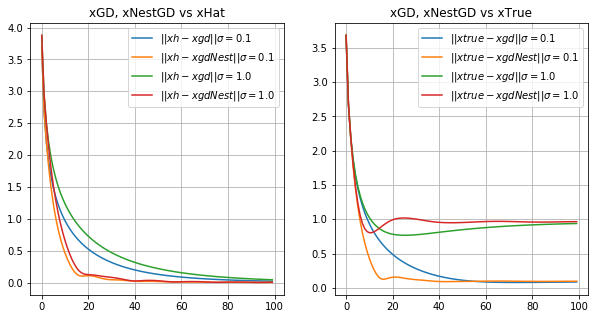

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
sigmas  = [0.1, 1]

for sigma in sigmas:
    np.random.seed(0)
    # set up A, x, and b
    A = randn(m,n)
    xtrue = rand(n,1)
    b = A@xtrue + sigma*randn(m,1)

    # parameters for lsgd
    mu = 1/norm(A,2)**2
    x0 = np.zeros((n,1))
    
    # lstsq solver solution
    xh = lstsq(A,b)[0]
    
    diff_xh = np.zeros(numIter)
    diff_xtrue = np.zeros(numIter)
    diff_xhNest = np.zeros(numIter)
    diff_xtrueNest = np.zeros(numIter)
    
    for ii in range(numIter):
        # perform lsgd, lsgdNesterov for ii iterations
        xgd = lsgd(A,b,mu,x0,ii)
        xgdNest = lsgdNesterov(A,b,mu,x0,ii)
        
        diff_xh[ii] = norm(xh - xgd,2)
        diff_xtrue[ii] = norm(xtrue - xgd,2)
        diff_xhNest[ii] = norm(xh - xgdNest,2)
        diff_xtrueNest[ii] = norm(xtrue - xgdNest,2)
        
    ax1.plot(diff_xh,label='$||xh - xgd|| \sigma = %.1f$'%sigma)
    ax1.plot(diff_xhNest,label='$||xh - xgdNest|| \sigma = %.1f$'%sigma)
    ax1.set_title('xGD, xNestGD vs xHat')

    ax2.plot(diff_xtrue,label='$||xtrue - xgd|| \sigma = %.1f$'%sigma)
    ax2.plot(diff_xtrueNest,label='$||xtrue - xgdNest|| \sigma = %.1f$'%sigma)
    ax2.set_title('xGD, xNestGD vs xTrue')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid();

## Non-negative least-squares gradient descent
Fitting a system of equations when we know the variables being fit are non-negative

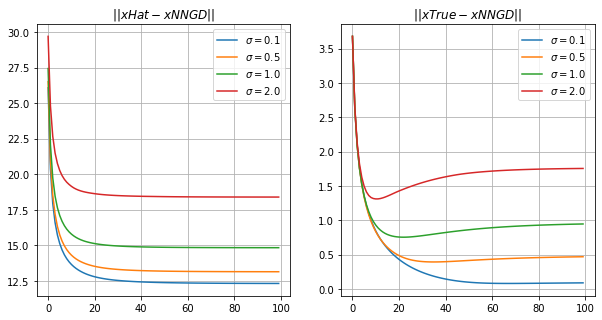

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
sigmas  = [0.1, 0.5, 1, 2]

for sigma in sigmas:
    np.random.seed(0)
    # set up A, x, and b
    A = randn(m,n)
    xtrue = rand(n,1)
    b = A@xtrue + sigma*randn(m,1)

    # parameters for lsgd
    mu = 1/norm(A,2)**2
    x0 = np.zeros((n,1))
    xh = lstsqNonNeg(A,b.squeeze())[0]
    
    diff_xh = np.zeros(numIter)
    diff_xtrue = np.zeros(numIter)
    diff_xhNN = np.zeros(numIter)
    diff_xtrueNN = np.zeros(numIter)
    
    for ii in range(numIter):
        # perform lsgdNN for ii iterations
        xgdNN = lsgdNonNeg(A,b,mu,x0,ii)
        
        diff_xhNN[ii] = norm(xh - xgdNN,2)
        diff_xtrueNN[ii] = norm(xtrue - xgdNN,2)
    
    ax1.plot(diff_xhNN,label='$\sigma = %.1f$'%sigma)
    ax1.set_title('$||xHat - xNNGD||$')
    
    ax2.plot(diff_xtrueNN,label='$\sigma = %.1f$'%sigma)
    ax2.set_title('$||xTrue - xNNGD||$')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid();